# OS Prediction
In this section we should predict the operating system of cellphones based on data we have. This section has two parts.  The difference between these two parts is on "Battery Capacity" field from dataset.

In [48]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pprint import pprint
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('./os_train_cleared.csv')
X_val = pd.read_csv('./os_val_cleared.csv')
X_test = pd.read_csv('./os_test_cleared.csv')
y_train = pd.read_csv('./target_train.csv')
y_val = pd.read_csv('./target_val.csv')
y_test = pd.read_csv('./target_test.csv')

In [3]:
X_train.shape

(1915, 27)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1915 non-null   float64
 1   1       1915 non-null   float64
 2   2       1915 non-null   float64
 3   3       1915 non-null   float64
 4   4       1915 non-null   float64
 5   5       1915 non-null   float64
 6   6       1915 non-null   float64
 7   7       1915 non-null   float64
 8   8       1915 non-null   float64
 9   9       1915 non-null   float64
 10  10      1915 non-null   float64
 11  11      1915 non-null   float64
 12  12      1915 non-null   float64
 13  13      1915 non-null   float64
 14  14      1915 non-null   float64
 15  15      1915 non-null   float64
 16  16      1915 non-null   float64
 17  17      1915 non-null   float64
 18  18      1915 non-null   float64
 19  19      1915 non-null   float64
 20  20      1915 non-null   float64
 21  21      1915 non-null   float64
 22  

In [5]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   OS      1915 non-null   int64
dtypes: int64(1)
memory usage: 15.1 KB


In [6]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
train_predict = dtc.predict(X_train)
val_predict = dtc.predict(X_val)


In [15]:
print("F1_score of train: ", f1_score(y_true=y_train, y_pred=train_predict, average='weighted'))
print("F1_score of validation: ", f1_score(y_true=y_val, y_pred=val_predict, average='weighted'))
print("accuracy_score of train: ", accuracy_score(y_true=y_train, y_pred=train_predict))
print("accuracy_score of validation: ", accuracy_score(y_true=y_val, y_pred=val_predict))
print("Precision of train: ", precision_score(y_true=y_train, y_pred=train_predict, average='weighted'))
print("Precision of validation: ", precision_score(y_true=y_val, y_pred=val_predict, average='weighted'))
print("Recall of train: ", recall_score(y_true=y_train, y_pred=train_predict, average='weighted'))
print("Recall of validation: ", recall_score(y_true=y_val, y_pred=val_predict, average='weighted'))


F1_score of train:  1.0
F1_score of validation:  0.9171597633136095
accuracy_score of train:  1.0
accuracy_score of validation:  0.9201183431952663
Precision of train:  1.0
Precision of validation:  0.9153846153846154
Recall of train:  1.0
Recall of validation:  0.9201183431952663


This result shows that our model is overfit! for example, compare confusion matrix of the result of predicted train and validation. it shows that in our train, we have guessed all "IOS" values correctly, but  in validation we guessed all of our "IOS" wrong! 

Text(50.722222222222214, 0.5, 'True Lables')

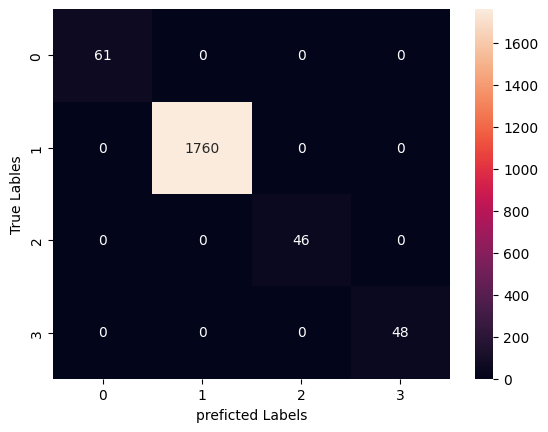

In [8]:
cm = confusion_matrix(y_train,train_predict)

sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")

Text(50.722222222222214, 0.5, 'True Lables')

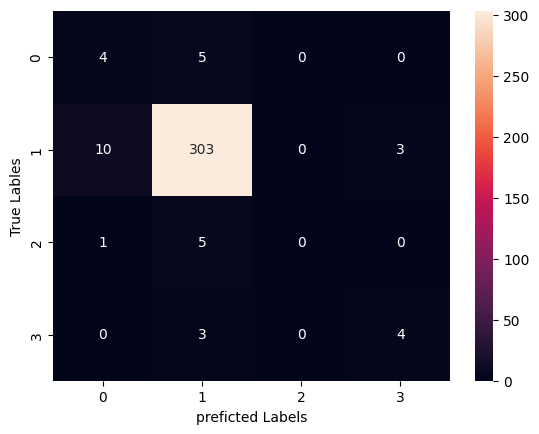

In [9]:
cm = confusion_matrix(y_val,val_predict)

sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")

Now, we try to work on our model. first, we will use a gridSeach to find our model with 

In [21]:
result = cross_validate(dtc, X_train, y_train, scoring='f1_weighted', cv=5, return_train_score=True)
pprint(result)

{'fit_time': array([0.02544236, 0.03546453, 0.02927089, 0.02832007, 0.025841  ]),
 'score_time': array([0.01167512, 0.00879931, 0.01069307, 0.00549316, 0.00751615]),
 'test_score': array([0.96228505, 0.95685955, 0.94726125, 0.9510466 , 0.93631753]),
 'train_score': array([1., 1., 1., 1., 1.])}


In [22]:
result = cross_validate(dtc, X_val, y_val, scoring='f1_weighted', cv=5, return_train_score=True)
pprint(result)

{'fit_time': array([0.01430917, 0.00817561, 0.00912547, 0.00968623, 0.0067687 ]),
 'score_time': array([0.00716543, 0.00653863, 0.00745869, 0.00760341, 0.00490499]),
 'test_score': array([0.91176471, 0.94379845, 0.90526676, 0.94527363, 0.9298668 ]),
 'train_score': array([1., 1., 1., 1., 1.])}


In [47]:
skfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for tr_index, tst_index in skfold.split(X_train, y_train):
    # print(X_train.iloc[tr_index])
    clone_dtc = clone(dtc)
    x_train_fold = X_train.iloc[tr_index]
    y_train_fold = y_train.iloc[tr_index]
    x_test_fold = X_train.iloc[tst_index]
    y_test_fold = y_train.iloc[tst_index]

    clone_dtc.fit(x_train_fold, y_train_fold)
    y_pred = clone_dtc.predict(x_test_fold)
    print(accuracy_score(y_true=y_test_fold, y_pred=y_pred))

0.9451697127937336
0.9477806788511749
0.95822454308094
0.95822454308094
0.9530026109660574


In [49]:
sgdc = SGDClassifier(random_state=42)
skfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for tr_index, tst_index in skfold.split(X_train, y_train):
    # print(X_train.iloc[tr_index])
    clone_sgdc = clone(sgdc)
    x_train_fold = X_train.iloc[tr_index]
    y_train_fold = y_train.iloc[tr_index]
    x_test_fold = X_train.iloc[tst_index]
    y_test_fold = y_train.iloc[tst_index]

    clone_sgdc.fit(x_train_fold, y_train_fold)
    y_pred = clone_sgdc.predict(x_test_fold)
    print(accuracy_score(y_true=y_test_fold, y_pred=y_pred))

0.9503916449086162
0.9425587467362925
0.9503916449086162
0.9295039164490861
0.9347258485639687


In [53]:
sgdc.fit(X_train, y_train)
val_predict = sgdc.predict(X_val)
result = cross_validate(sgdc, X_val, y_val, scoring='f1_weighted', cv=5, return_train_score=True)
pprint(result)

{'fit_time': array([0.01676559, 0.02027082, 0.0197494 , 0.03398442, 0.01570272]),
 'score_time': array([0.0074935 , 0.00711894, 0.01290846, 0.01387358, 0.00957108]),
 'test_score': array([0.89501312, 0.93432869, 0.9003648 , 0.94029851, 0.94793748]),
 'train_score': array([0.94576656, 0.94728759, 0.96955071, 0.94684914, 0.95487822])}


Text(50.722222222222214, 0.5, 'True Lables')

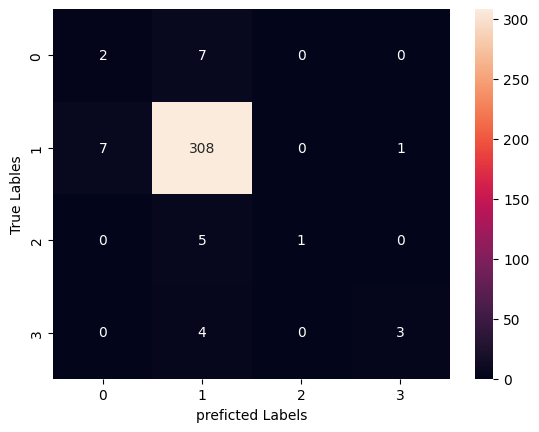

In [54]:
cm = confusion_matrix(y_val,val_predict)

sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")